In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import plotly.express as px
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [124]:
df = pd.read_csv("heart_fail_data.csv")

In [125]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [126]:
df.shape

(299, 13)

In [127]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [129]:
df.rename(columns = {"creatinine_phosphokinase":"cpx","DEATH_EVENT":"death_events"}, inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   cpx                  299 non-null    int64  
 3   diabetes             299 non-null    int64  
 4   ejection_fraction    299 non-null    int64  
 5   high_blood_pressure  299 non-null    int64  
 6   platelets            299 non-null    float64
 7   serum_creatinine     299 non-null    float64
 8   serum_sodium         299 non-null    int64  
 9   sex                  299 non-null    int64  
 10  smoking              299 non-null    int64  
 11  time                 299 non-null    int64  
 12  death_events         299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## EDA

### Anaemia

In [131]:
ds = df['anaemia'].value_counts().reset_index()
ds.columns = ['anaemia', 'count']
ds

,anaemia,count
0,0,170
1,1,129


In [132]:
fig = px.bar(ds, x='anaemia', y='count', width=500, title="The number of patiets having anaemia")
fig

Text(0, 0.5, 'Death')

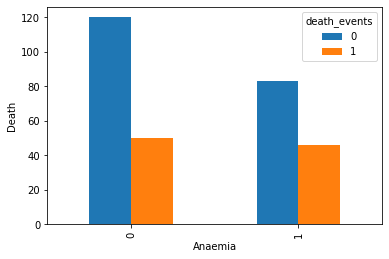

In [133]:
pd.crosstab(df.anaemia, df.death_events).plot(kind = "bar")
plt.xlabel("Anaemia")
plt.ylabel("Death")

### Smoking

In [134]:
ds = df['smoking'].value_counts().reset_index()
ds.columns = ['smoking', "count"]
ds.head()

,smoking,count
0,0,203
1,1,96


In [135]:
fig = px.bar(ds, x='smoking', y="count", title="Count of people smoking", width=500)
fig.show()

<AxesSubplot:xlabel='smoking'>

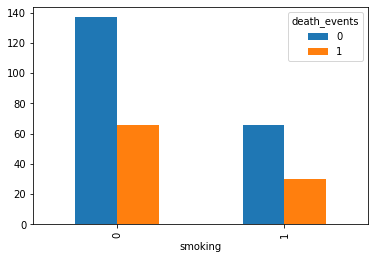

In [136]:
pd.crosstab(df['smoking'], df['death_events']).plot(kind='bar')

In [137]:
## Lets calculate the percentage of people who died and used to smoke
print("The people who died and were smokers",df['death_events'][df['smoking']==1].value_counts(normalize=True)[1]*100)

The people who died and were smokers 31.25


In [138]:
## Lets calculate the number of people who died and were non smokers
print("The number of people who died and were non smokers: ",df['death_events'][df['smoking']==0].value_counts(normalize=True)[1]*100)

The number of people who died and were non smokers:  32.51231527093596


In [139]:
### Looking at the observations above, the number of people who died are non smokers(32.51).

## Blood Pressure

In [140]:
ds = df['high_blood_pressure'].value_counts().reset_index()
ds.columns = ['high_bp', 'count']
ds.head()

,high_bp,count
0,0,194
1,1,105


In [141]:
fig = px.bar(ds, x='high_bp', y='count', title="Count of people having high blood pressure", width=500)
fig.show()

Text(0, 0.5, 'death Count')

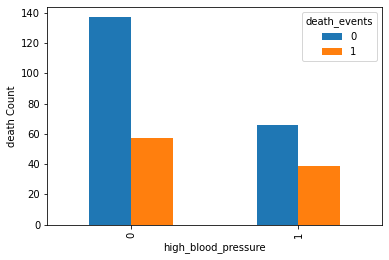

In [142]:
pd.crosstab(df.high_blood_pressure, df.death_events).plot(kind='bar')
plt.ylabel("death Count")

## Diabetes

In [143]:
ds = df['diabetes'].value_counts().reset_index()
ds.columns = ['diabetes', 'count']
ds

,diabetes,count
0,0,174
1,1,125


In [144]:
px.bar(ds, x='diabetes', y='count', width=500, title = "The number of people suffering from diabetes")

Text(0.5, 1.0, 'The number of people died and were suffering from diabetes (all possibilities)')

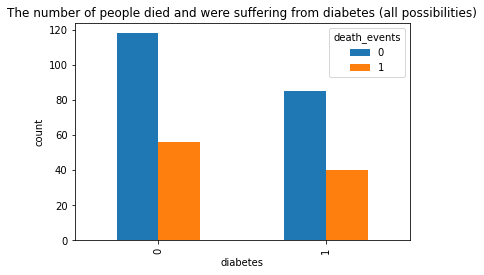

In [145]:
pd.crosstab(df.diabetes, df.death_events).plot(kind='bar')
plt.ylabel('count')
plt.title('The number of people died and were suffering from diabetes (all possibilities)')

In [146]:
print("The percentage of people who died and"+
       "suffered from diabetes is: ",df['death_events'][df['diabetes']==1].value_counts(normalize=True)[1]*100,"%")

The percentage of people who died andsuffered from diabetes is:  32.0 %


## Sex

In [147]:
ds = df.sex.value_counts().reset_index()
ds.columns = ['sex', 'count']
ds

,sex,count
0,1,194
1,0,105


In [148]:
#sex=0 = female
#sex=1 = male
px.bar(ds, x='sex', y='count', title="Sex/Count", width=500)

Text(0.5, 1.0, 'Death of people according to their sex')

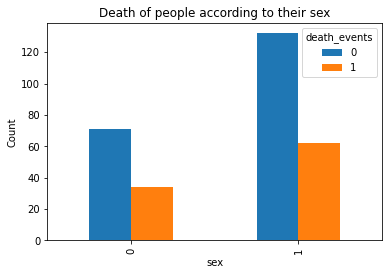

In [149]:
pd.crosstab(df['sex'], df['death_events']).plot(kind='bar')
plt.ylabel('Count')
plt.title('Death of people according to their sex')

In [150]:
print("Percentage of Females who died: ",df['death_events'][df['sex']==0].value_counts(normalize=True)[1]*100)
print("Percentage of Males who have died: ",df['death_events'][df['sex']==1].value_counts(normalize=True)[1]*100)

Percentage of Females who died:  32.38095238095238
Percentage of Males who have died:  31.958762886597935


By looking at the mortality rate above based on the genders, we can conclude that females have a higher mortality rate as compared to males

In [151]:
g_30 = list()
g_50 = list()
g_70 = list()
greater70 = list()
def add_age(x):
    for i in x:
        if i <=30:
            g_30.append(1)
            g_50.append(0)
            g_70.append(0)
            greater70.append(0)
        if i>30 and i<=50:
            g_30.append(0)
            g_50.append(1)
            g_70.append(0)
            greater70.append(0)
        if i>50 and i<=70:
            g_30.append(0)
            g_50.append(0)
            g_70.append(1)
            greater70.append(0)
        if i>70:
            g_30.append(0)
            g_50.append(0)
            g_70.append(0)
            greater70.append(1)
            
add_age(df['age'])

In [152]:
df["Till_30"]=g_30
df["30_to_50"]=g_50
df["50_to_70"]=g_70
df['Greater_than_70']=greater70

In [153]:
df.rename(columns = {"Till_30": "till_30", "Greater_than_70": "greater_than_70"}, inplace=True)

In [154]:
df.head()

,age,anaemia,cpx,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_events,till_30,30_to_50,50_to_70,greater_than_70
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0,0,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,0,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,1,0,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,0,1,0


In [155]:
df['till_30'].value_counts()

0    299
Name: till_30, dtype: int64

As we can see there are no entries for the age group below 30 so we will move further

In [156]:
ds = df['30_to_50'].value_counts().reset_index()
ds.columns = ['Bet_30_50', 'count']
ds
px.bar(ds, x='Bet_30_50', y='count', width=500)

<AxesSubplot:xlabel='death_events'>

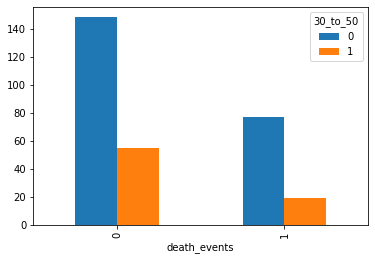

In [157]:
## Calculating the death of this age group
pd.crosstab(df['death_events'], df['30_to_50']).plot(kind='bar')

In [158]:
#Calculating the mortality rate of this age group
print("Mortality Rate: ", df['death_events'][df["30_to_50"]==1].value_counts(normalize=True)[1]*100)

Mortality Rate:  25.675675675675674


This age group i.e 30 to 50 has a mortality rate of 25%

In [159]:
#Age group 50 to 70
ds = df["50_to_70"].value_counts().reset_index()
ds.columns = ['age', 'count']
ds

,age,count
0,1,173
1,0,126


In [160]:
px.bar(ds, x=ds['age'], y=ds['count'], width=500, title="Deaths of the age group between 50 to 70")

Text(0.5, 0, 'Age between 50 to 70')

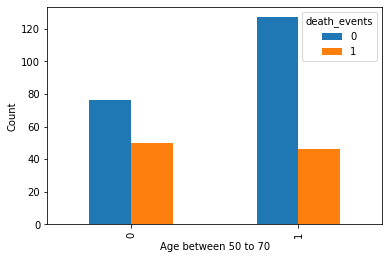

In [161]:
pd.crosstab(df['50_to_70'], df['death_events']).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Age between 50 to 70")

In [162]:
#Calculating the mortality rate of this age group
print(df["death_events"][df['50_to_70']==1].value_counts(normalize=True)[1]*100)

26.589595375722542


In [163]:
#For age group above 70
ds = df["greater_than_70"].value_counts().reset_index()
ds.columns = ["age", 'count']
ds

,age,count
0,0,247
1,1,52


In [164]:
px.bar(ds, x='age', y='count', width=500, title="Age group of 70 yrs and above")

<AxesSubplot:xlabel='greater_than_70'>

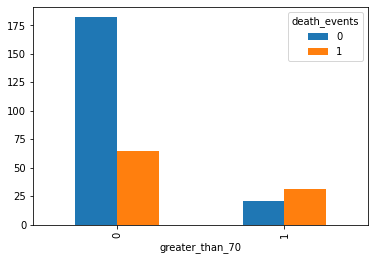

In [165]:
pd.crosstab(df['greater_than_70'], df["death_events"]).plot(kind="bar")

In [166]:
#calculating the mortality rate of this age group
print("The mortality rate of this age group is:", df["death_events"][df["greater_than_70"]==1].value_counts(normalize=True)[1]*100)

The mortality rate of this age group is: 59.61538461538461


The age group of 70 years and aboce has the highest mortality rate

Long form graphs

In [167]:
fig = px.bar(df, x='sex', y='age', color="death_events")
fig.update_layout(yaxis_range=[0,10000])
fig.show()

In [168]:
px.bar(df, x='diabetes', y='age', color = 'death_events')

In [169]:
px.bar(df, x='smoking', y='age', color='death_events')

## Box PLots

In [170]:
px.violin(df, x='smoking', y='age', color='death_events', box=True, points='all')

In [171]:
px.violin(df, x='diabetes', y='age', color='death_events', points="all", box=True)

## Training the data

In [172]:
X = df.drop(columns = ['death_events'], axis=1)
y= df.death_events

In [173]:
scaler = MinMaxScaler(feature_range=(0, 100))
X['cpx'] = scaler.fit_transform(X[['cpx']])
X['platelets'] = scaler.fit_transform(X[['platelets']])

In [174]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25, random_state=1 )

In [176]:
class_weights = {0:1, 1:2}
mymodel = CatBoostClassifier(n_estimators = 1000,class_weights=class_weights)

In [177]:
mymodel.fit(X_train, y_train)

Learning rate set to 0.005439
0:	learn: 0.6890892	total: 55.5ms	remaining: 55.4s
1:	learn: 0.6847886	total: 57ms	remaining: 28.4s
2:	learn: 0.6812887	total: 58.3ms	remaining: 19.4s
3:	learn: 0.6771416	total: 59.7ms	remaining: 14.9s
4:	learn: 0.6734213	total: 61ms	remaining: 12.1s
5:	learn: 0.6694806	total: 62.3ms	remaining: 10.3s
6:	learn: 0.6664717	total: 63.5ms	remaining: 9.01s
7:	learn: 0.6635963	total: 64.8ms	remaining: 8.03s
8:	learn: 0.6606425	total: 66ms	remaining: 7.27s
9:	learn: 0.6570509	total: 67.2ms	remaining: 6.66s
10:	learn: 0.6535543	total: 68.4ms	remaining: 6.15s
11:	learn: 0.6502898	total: 69.6ms	remaining: 5.73s
12:	learn: 0.6464768	total: 70.7ms	remaining: 5.37s
13:	learn: 0.6430019	total: 71.8ms	remaining: 5.06s
14:	learn: 0.6404240	total: 72.9ms	remaining: 4.79s
15:	learn: 0.6372592	total: 74ms	remaining: 4.55s
16:	learn: 0.6346266	total: 75.1ms	remaining: 4.34s
17:	learn: 0.6314935	total: 76.1ms	remaining: 4.15s
18:	learn: 0.6281632	total: 77.3ms	remaining: 3.99s


298:	learn: 0.2782221	total: 366ms	remaining: 858ms
299:	learn: 0.2777956	total: 367ms	remaining: 857ms
300:	learn: 0.2774381	total: 368ms	remaining: 855ms
301:	learn: 0.2768414	total: 369ms	remaining: 853ms
302:	learn: 0.2762940	total: 370ms	remaining: 852ms
303:	learn: 0.2759359	total: 371ms	remaining: 850ms
304:	learn: 0.2753958	total: 372ms	remaining: 848ms
305:	learn: 0.2748568	total: 373ms	remaining: 846ms
306:	learn: 0.2742209	total: 374ms	remaining: 845ms
307:	learn: 0.2739348	total: 375ms	remaining: 843ms
308:	learn: 0.2733011	total: 376ms	remaining: 841ms
309:	learn: 0.2729777	total: 377ms	remaining: 839ms
310:	learn: 0.2726207	total: 378ms	remaining: 838ms
311:	learn: 0.2722061	total: 379ms	remaining: 836ms
312:	learn: 0.2719021	total: 380ms	remaining: 834ms
313:	learn: 0.2715224	total: 381ms	remaining: 832ms
314:	learn: 0.2711585	total: 382ms	remaining: 831ms
315:	learn: 0.2708224	total: 383ms	remaining: 829ms
316:	learn: 0.2703290	total: 384ms	remaining: 828ms
317:	learn: 

477:	learn: 0.2101916	total: 549ms	remaining: 599ms
478:	learn: 0.2100833	total: 550ms	remaining: 598ms
479:	learn: 0.2099834	total: 551ms	remaining: 597ms
480:	learn: 0.2096048	total: 552ms	remaining: 596ms
481:	learn: 0.2092415	total: 553ms	remaining: 594ms
482:	learn: 0.2089221	total: 554ms	remaining: 593ms
483:	learn: 0.2085689	total: 555ms	remaining: 592ms
484:	learn: 0.2083594	total: 556ms	remaining: 590ms
485:	learn: 0.2078494	total: 557ms	remaining: 589ms
486:	learn: 0.2074751	total: 558ms	remaining: 588ms
487:	learn: 0.2071072	total: 559ms	remaining: 586ms
488:	learn: 0.2066882	total: 560ms	remaining: 585ms
489:	learn: 0.2064027	total: 561ms	remaining: 584ms
490:	learn: 0.2058710	total: 562ms	remaining: 583ms
491:	learn: 0.2055908	total: 563ms	remaining: 581ms
492:	learn: 0.2053460	total: 564ms	remaining: 580ms
493:	learn: 0.2050286	total: 565ms	remaining: 579ms
494:	learn: 0.2047785	total: 566ms	remaining: 578ms
495:	learn: 0.2044537	total: 567ms	remaining: 576ms
496:	learn: 

813:	learn: 0.1338118	total: 895ms	remaining: 204ms
814:	learn: 0.1336326	total: 896ms	remaining: 203ms
815:	learn: 0.1333526	total: 897ms	remaining: 202ms
816:	learn: 0.1330984	total: 898ms	remaining: 201ms
817:	learn: 0.1329790	total: 899ms	remaining: 200ms
818:	learn: 0.1327686	total: 900ms	remaining: 199ms
819:	learn: 0.1325837	total: 901ms	remaining: 198ms
820:	learn: 0.1323834	total: 903ms	remaining: 197ms
821:	learn: 0.1321770	total: 904ms	remaining: 196ms
822:	learn: 0.1321056	total: 905ms	remaining: 195ms
823:	learn: 0.1318984	total: 906ms	remaining: 193ms
824:	learn: 0.1316918	total: 907ms	remaining: 192ms
825:	learn: 0.1315466	total: 908ms	remaining: 191ms
826:	learn: 0.1313651	total: 909ms	remaining: 190ms
827:	learn: 0.1311755	total: 910ms	remaining: 189ms
828:	learn: 0.1310173	total: 911ms	remaining: 188ms
829:	learn: 0.1308051	total: 912ms	remaining: 187ms
830:	learn: 0.1306934	total: 913ms	remaining: 186ms
831:	learn: 0.1305697	total: 914ms	remaining: 185ms
832:	learn: 

982:	learn: 0.1078613	total: 1.08s	remaining: 18.6ms
983:	learn: 0.1077695	total: 1.08s	remaining: 17.5ms
984:	learn: 0.1075905	total: 1.08s	remaining: 16.4ms
985:	learn: 0.1073749	total: 1.08s	remaining: 15.3ms
986:	learn: 0.1072931	total: 1.08s	remaining: 14.2ms
987:	learn: 0.1071636	total: 1.08s	remaining: 13.1ms
988:	learn: 0.1070567	total: 1.08s	remaining: 12ms
989:	learn: 0.1069026	total: 1.08s	remaining: 10.9ms
990:	learn: 0.1067186	total: 1.08s	remaining: 9.85ms
991:	learn: 0.1066494	total: 1.08s	remaining: 8.76ms
992:	learn: 0.1064799	total: 1.09s	remaining: 7.66ms
993:	learn: 0.1063610	total: 1.09s	remaining: 6.57ms
994:	learn: 0.1062310	total: 1.09s	remaining: 5.47ms
995:	learn: 0.1060573	total: 1.09s	remaining: 4.38ms
996:	learn: 0.1059380	total: 1.09s	remaining: 3.28ms
997:	learn: 0.1057668	total: 1.09s	remaining: 2.19ms
998:	learn: 0.1056537	total: 1.09s	remaining: 1.09ms
999:	learn: 0.1056081	total: 1.09s	remaining: 0us


In [180]:
print("Training score: {:.3f}".format(accuracy_score(y_train, mymodel.predict(X_train))))
print("Test Score: {}".format(accuracy_score(y_test, mymodel.predict(X_test))))

Training score: 0.996
Test Score: 0.88


In [181]:
#without using class weights
mymodel = CatBoostClassifier(n_estimators=1000)
mymodel.fit(X_train, y_train)

Learning rate set to 0.005439
0:	learn: 0.6900982	total: 1.32ms	remaining: 1.32s
1:	learn: 0.6849978	total: 2.71ms	remaining: 1.35s
2:	learn: 0.6811741	total: 4.08ms	remaining: 1.36s
3:	learn: 0.6768125	total: 5.44ms	remaining: 1.35s
4:	learn: 0.6730221	total: 6.83ms	remaining: 1.36s
5:	learn: 0.6689985	total: 8.23ms	remaining: 1.36s
6:	learn: 0.6660921	total: 9.68ms	remaining: 1.37s
7:	learn: 0.6627396	total: 11ms	remaining: 1.37s
8:	learn: 0.6596957	total: 12.5ms	remaining: 1.37s
9:	learn: 0.6562147	total: 13.9ms	remaining: 1.37s
10:	learn: 0.6525358	total: 15.2ms	remaining: 1.36s
11:	learn: 0.6488328	total: 16.5ms	remaining: 1.36s
12:	learn: 0.6445326	total: 17.8ms	remaining: 1.35s
13:	learn: 0.6406295	total: 19ms	remaining: 1.34s
14:	learn: 0.6374491	total: 20.4ms	remaining: 1.34s
15:	learn: 0.6338736	total: 21.7ms	remaining: 1.33s
16:	learn: 0.6308448	total: 23ms	remaining: 1.33s
17:	learn: 0.6276315	total: 24.2ms	remaining: 1.32s
18:	learn: 0.6239096	total: 25.4ms	remaining: 1.31

169:	learn: 0.3496220	total: 180ms	remaining: 879ms
170:	learn: 0.3488448	total: 181ms	remaining: 878ms
171:	learn: 0.3483653	total: 182ms	remaining: 877ms
172:	learn: 0.3469941	total: 183ms	remaining: 876ms
173:	learn: 0.3460604	total: 184ms	remaining: 875ms
174:	learn: 0.3451514	total: 185ms	remaining: 874ms
175:	learn: 0.3439852	total: 186ms	remaining: 872ms
176:	learn: 0.3432691	total: 188ms	remaining: 872ms
177:	learn: 0.3421601	total: 189ms	remaining: 871ms
178:	learn: 0.3412385	total: 190ms	remaining: 870ms
179:	learn: 0.3402793	total: 191ms	remaining: 869ms
180:	learn: 0.3396135	total: 192ms	remaining: 867ms
181:	learn: 0.3387664	total: 193ms	remaining: 866ms
182:	learn: 0.3381048	total: 194ms	remaining: 865ms
183:	learn: 0.3372679	total: 195ms	remaining: 863ms
184:	learn: 0.3364133	total: 196ms	remaining: 862ms
185:	learn: 0.3355877	total: 197ms	remaining: 861ms
186:	learn: 0.3348337	total: 198ms	remaining: 859ms
187:	learn: 0.3339547	total: 199ms	remaining: 858ms
188:	learn: 

492:	learn: 0.1889951	total: 519ms	remaining: 534ms
493:	learn: 0.1886515	total: 521ms	remaining: 533ms
494:	learn: 0.1883455	total: 522ms	remaining: 533ms
495:	learn: 0.1879909	total: 523ms	remaining: 531ms
496:	learn: 0.1876772	total: 524ms	remaining: 530ms
497:	learn: 0.1873492	total: 525ms	remaining: 529ms
498:	learn: 0.1871415	total: 526ms	remaining: 528ms
499:	learn: 0.1868433	total: 527ms	remaining: 527ms
500:	learn: 0.1865356	total: 528ms	remaining: 526ms
501:	learn: 0.1862865	total: 529ms	remaining: 525ms
502:	learn: 0.1858653	total: 530ms	remaining: 524ms
503:	learn: 0.1854495	total: 531ms	remaining: 523ms
504:	learn: 0.1852144	total: 532ms	remaining: 522ms
505:	learn: 0.1849698	total: 533ms	remaining: 521ms
506:	learn: 0.1847209	total: 535ms	remaining: 520ms
507:	learn: 0.1845517	total: 536ms	remaining: 519ms
508:	learn: 0.1843543	total: 537ms	remaining: 518ms
509:	learn: 0.1841220	total: 538ms	remaining: 517ms
510:	learn: 0.1838454	total: 539ms	remaining: 516ms
511:	learn: 

672:	learn: 0.1454568	total: 703ms	remaining: 342ms
673:	learn: 0.1452715	total: 704ms	remaining: 341ms
674:	learn: 0.1449831	total: 705ms	remaining: 340ms
675:	learn: 0.1448196	total: 706ms	remaining: 338ms
676:	learn: 0.1445837	total: 707ms	remaining: 337ms
677:	learn: 0.1444380	total: 708ms	remaining: 336ms
678:	learn: 0.1442821	total: 709ms	remaining: 335ms
679:	learn: 0.1439859	total: 710ms	remaining: 334ms
680:	learn: 0.1438971	total: 711ms	remaining: 333ms
681:	learn: 0.1436499	total: 712ms	remaining: 332ms
682:	learn: 0.1434002	total: 713ms	remaining: 331ms
683:	learn: 0.1431935	total: 714ms	remaining: 330ms
684:	learn: 0.1431148	total: 715ms	remaining: 329ms
685:	learn: 0.1428584	total: 716ms	remaining: 328ms
686:	learn: 0.1424615	total: 717ms	remaining: 327ms
687:	learn: 0.1421904	total: 718ms	remaining: 326ms
688:	learn: 0.1420298	total: 719ms	remaining: 325ms
689:	learn: 0.1417273	total: 720ms	remaining: 324ms
690:	learn: 0.1415692	total: 721ms	remaining: 322ms
691:	learn: 

853:	learn: 0.1145564	total: 886ms	remaining: 151ms
854:	learn: 0.1144029	total: 887ms	remaining: 150ms
855:	learn: 0.1141516	total: 888ms	remaining: 149ms
856:	learn: 0.1139842	total: 889ms	remaining: 148ms
857:	learn: 0.1138290	total: 890ms	remaining: 147ms
858:	learn: 0.1136933	total: 892ms	remaining: 146ms
859:	learn: 0.1135335	total: 893ms	remaining: 145ms
860:	learn: 0.1133172	total: 894ms	remaining: 144ms
861:	learn: 0.1132451	total: 895ms	remaining: 143ms
862:	learn: 0.1130982	total: 896ms	remaining: 142ms
863:	learn: 0.1129469	total: 897ms	remaining: 141ms
864:	learn: 0.1127540	total: 898ms	remaining: 140ms
865:	learn: 0.1126176	total: 899ms	remaining: 139ms
866:	learn: 0.1124153	total: 900ms	remaining: 138ms
867:	learn: 0.1121888	total: 901ms	remaining: 137ms
868:	learn: 0.1120146	total: 903ms	remaining: 136ms
869:	learn: 0.1118580	total: 904ms	remaining: 135ms
870:	learn: 0.1117972	total: 905ms	remaining: 134ms
871:	learn: 0.1116629	total: 906ms	remaining: 133ms
872:	learn: 

In [182]:
print("Training score: {:.3f}".format(accuracy_score(y_train, mymodel.predict(X_train))))
print("Test Score: {}".format(accuracy_score(y_test, mymodel.predict(X_test))))

Training score: 0.996
Test Score: 0.9066666666666666


In [183]:
preds = mymodel.predict(X_test)

In [185]:
print(confusion_matrix(y_test,preds))

[[53  2]
 [ 5 15]]


In [186]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.88      0.75      0.81        20

    accuracy                           0.91        75
   macro avg       0.90      0.86      0.87        75
weighted avg       0.91      0.91      0.90        75

